# Setup do projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

RANDOM_STATE = 42

# Carga de Dados

In [2]:
bike = pd.read_csv('../datasets/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Analise Exploratoria

In [3]:
print('Dimensões dos dataset horas: ', bike.shape)

Dimensões dos dataset horas:  (731, 16)


In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# Treinamento e teste do modelo

In [6]:
del bike['dteday']
X = bike.drop('cnt', axis=1).values
y = bike['cnt'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [8]:
print('X_train shape', X_train.shape)
print('X_test shape', X_train.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (584, 14)
X_test shape (584, 14)
y_train shape (584,)
y_test shape (147,)


# Base de compararacao

In [9]:
colunas = list(bike.columns)
y_hist = X_test[:, colunas.index('registered')]
print('MAE :', mean_absolute_error(y_test, y_hist))
print('MSE :', mean_squared_error(y_test, y_hist))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hist)))

MAE : 769.7210884353741
MSE : 982073.9931972789
RMSE: 990.9964647753688


# Treimamento do modelo

In [10]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

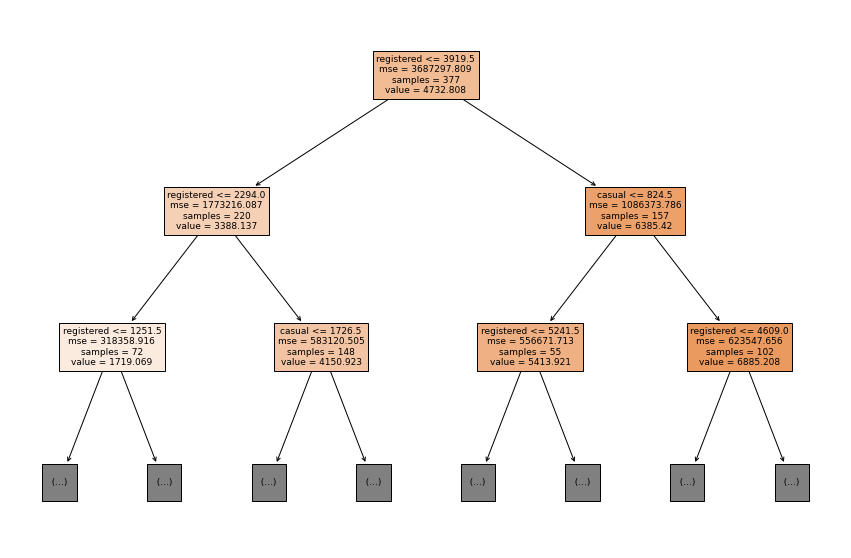

In [11]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15,10))
_=plot_tree(rf.estimators_[5], filled=True, feature_names=colunas, max_depth=2)

# Importância das variáveis independentes

In [12]:
importancias = list(rf.feature_importances_)
variaveis_importancias = [(coluna, importancia) for coluna, importancia in zip(colunas, importancias)]
variaveis_importancias = sorted(variaveis_importancias, key=lambda x:x[1], reverse=True)
for v, i in variaveis_importancias:
    print(f'Variavel: {v:10} - Importancia: {i}')

Variavel: registered - Importancia: 0.8884397924973318
Variavel: casual     - Importancia: 0.09759793112963223
Variavel: instant    - Importancia: 0.009103573588542366
Variavel: atemp      - Importancia: 0.0008543444409110365
Variavel: windspeed  - Importancia: 0.0007532658931708583
Variavel: temp       - Importancia: 0.0007231284858399025
Variavel: hum        - Importancia: 0.0007072797484431627
Variavel: workingday - Importancia: 0.0005616037140108499
Variavel: weekday    - Importancia: 0.00034943473744191057
Variavel: mnth       - Importancia: 0.0003145970856792221
Variavel: yr         - Importancia: 0.00027049569813741885
Variavel: weathersit - Importancia: 0.00017089476526957383
Variavel: season     - Importancia: 0.00013548523698042267
Variavel: holiday    - Importancia: 1.8172978609176843e-05


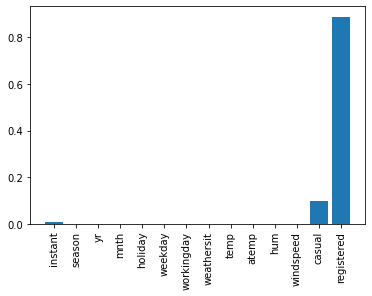

In [13]:
X_valores = list(range(len(importancias)))
_=plt.bar(X_valores, importancias)
colunas = colunas[:-1]
_=plt.xticks(X_valores, colunas, rotation='vertical')

In [14]:
rf_imp = RandomForestRegressor(n_estimators=100, random_state=42)
indices = [colunas.index('casual'), colunas.index('registered')]
X_train_imp = X_train[:, indices]
X_test_imp = X_test[:, indices]
rf_imp.fit(X_train_imp, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = rf_imp.predict(X_test_imp)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 47.26238095238095
MSE : 6518.596112244898
RMSE: 80.73782330633455


# Avaliacao de outros modelos

In [16]:
def build_regressors():
    regressors = []

    regressors.append(
        ('lr', 
        LinearRegression(),
        {'fit_intercept': [True, False]})
    )

    regressors.append(
        ('svr',
        SVR(),
        {'C': [0.1, 1, 10],
         'gamma': [0.00001, 0.0001, 0.001, 0.01, 1],
         'epsilon': [0.0001, 0.005, 0.001, 1, 5, 10]})
    )

    return regressors

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

train_results = []
test_results = []
names = []

scoring = 'neg_root_mean_squared_error'

regressors = build_regressors()
kfold = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

for name, regressor, params in regressors:
    print(f">>> pregressor : {name}")

    # Treinamento
    gs = GridSearchCV(regressor, param_grid=params, scoring=scoring, verbose=1)
    gs.fit(X_train, y_train)
    cv_results = cross_val_score(gs, X_train, y_train, cv=kfold, scoring=scoring) # análise
    names.append(name)
    train_results.append(abs(cv_results))

    # Teste
    y_pred = gs.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    test_results.append(rmse)

>>> pregressor : lr
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
>>> pregressor : svr
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Fitting 5 folds for each of 90 candidates, totalling 450 fits


Text(0.5, 0, 'Regressores')

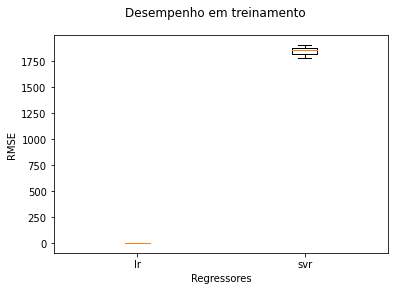

In [18]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho em treinamento')
_ = plt.boxplot(train_results)
ax.set_xticklabels(names)
ax.set_ylabel('RMSE')
ax.set_xlabel('Regressores')

Text(0.5, 0, 'Regressores')

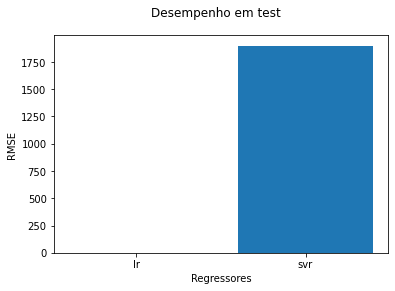

In [19]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho em test')
_ = plt.bar(names, test_results)
ax.set_ylabel('RMSE')
ax.set_xlabel('Regressores')